In [1]:
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Epoch 1/50


2023-05-02 15:12:15.877259: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


235/235 [==============================] - 3s 9ms/step - loss: 0.2137 - val_loss: 0.1373
Epoch 2/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1229 - val_loss: 0.1096
Epoch 3/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1056 - val_loss: 0.1004
Epoch 4/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0985 - val_loss: 0.0959
Epoch 5/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0948 - val_loss: 0.0920
Epoch 6/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0920 - val_loss: 0.0903
Epoch 7/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0897 - val_loss: 0.0878
Epoch 8/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0878 - val_loss: 0.0859
Epoch 9/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0863 - val_loss: 0.0851
Epoch 10/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0849 - val_loss: 0.0835
Epoch 11/5

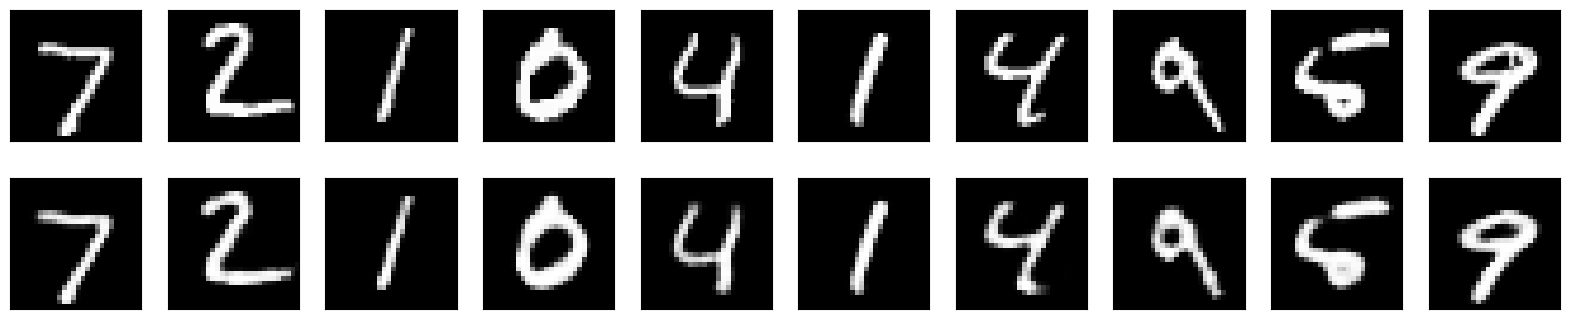

In [2]:


# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten images to a single vector
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define autoencoder architecture
input_img = Input(shape=(784,))
encoded = Dense(256, activation='relu')(input_img)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# Compile model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train autoencoder on MNIST dataset
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Test autoencoder on some examples
decoded_imgs = autoencoder.predict(x_test)

# Display original and reconstructed images
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()
